# Homemade Multiclass Perceptron

In [27]:
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from copy import deepcopy

class MultiClassPerceptron(object):
    
    def __init__(self, n_epochs = 1000, verbose = 0):
        self.weights = None
        self.n_epochs = n_epochs
        self.verbose = verbose
    
    def fit(self, x, y):
        # Append a ones column to the feature for the bias
        data = np.ones((x.shape[0], x.shape[1]+1))
        data[:, 0:x.shape[1]] = x
        # Set the targets as integers for comparison
        targets = y.astype(int)
    
        # Initialize the weights as a matrix 
        # number of classes by number of features
        weights = np.zeros((len(set(y)), x.shape[1]+1))
        past_weights = np.zeros((len(set(y)), x.shape[1]+1))
        for epoch in range(self.n_epochs):
            for i, target in zip(data, targets):
                temp = np.dot(i, weights.T)
                pred = np.argmax(temp)
                # If wrongly predicted update prediction
                if pred != target:
                    weights[target, :] = weights[target, :] + i
                    weights[pred, :] = weights[pred, :] - i
        
            if np.abs(weights - past_weights).all() < np.finfo(float).eps:
                break
            past_weights = deepcopy(weights)
        
            if self.verbose == 1:
                print('Iteration: ', epoch)
                print(weights)
                print('---------------------------------------------')
        self.weights = weights

    def predict(self, x):
        data = np.ones((  x.shape[0], x.shape[1]+1  ))
        data[:, 0:x.shape[1]] = x
        predictions = np.argmax(np.dot(data, self.weights.T), axis = 1)
        return predictions

    def score(self, x, y):
        pred = self.predict(x)
        return sum(pred == y_test)/len(pred)

Generate data

In [12]:
def gen_data(params, n):
    dims = len(params[0])
    num_classes = len(params)
    
    x = np.zeros((n*num_classes, dims))
    y = np.zeros((n*num_classes,))
    for ix, i in enumerate(range(num_classes)):
        inst = np.random.randn(n, dims)
        
        for dim in range(dims): x[ix*n:(ix+1)*n,dim] = np.random.normal(params[ix][dim][0], 
                                                                        params[ix][dim][1], n)
        y[ix*n:(ix+1)*n] = ix
    return x, y

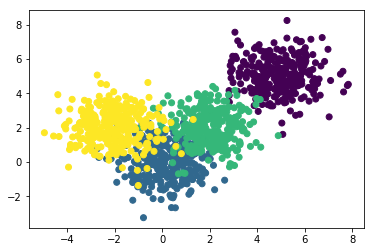

In [13]:
params = [[[ 5,0.5],  [ 5,0.5]], 
          [[ 0,0.5],  [ 0,0.5]], 
          [[-5,0.5],  [ -5,0.5]],
          [[-5,0.5],  [1,0.5]]]

params = [[[ 5,1],  [ 5,1]], 
          [[ 0,1],  [ 0,1]],
          [[2, 1],  [ 2,1]],
          [[-2, 1],  [ 2,1]]]

n = 300
x, y = gen_data(params, 300)

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Test the classifier

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

clf = MultiClassPerceptron(n_epochs = 3000, verbose = 0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9015151515151515

Validate the results

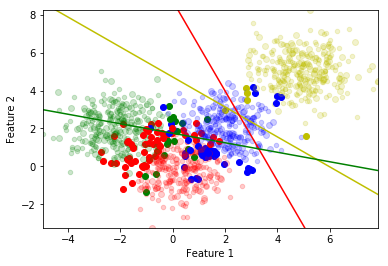

In [22]:
example = [-5,-5,1]

colors = ['y', 'r', 'b', 'g', 'k']

# Predict training set
predictions = clf.predict(x_train)
for i, t, p in zip(x_train, y_train, predictions):
    if t == p: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 0.2, s=20)
    else: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 1)

# Predict test set
predictions = clf.predict(x_test)
for i, t, p in zip(x_test, y_test, predictions):
    if t == p: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 0.2)
    else: plt.scatter(i[0], i[1], c=colors[int(t)], alpha = 1)
    
# Plot the linear separators
x1 = np.linspace(np.min(x[:,0]),np.max(x[:,1]),2)
x2 = np.zeros((clf.weights.shape[0], 2))
for ix_w, weight in enumerate(clf.weights):
    x2 = 1 * ( - weight[2] - weight[1]*x1) / weight[0]
    plt.plot(x1, x2, c = colors[ix_w])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.xlim([np.min(x[:,0]), np.max(x[:,0])])
plt.ylim([np.min(x[:,1]), np.max(x[:,1])])

plt.show()

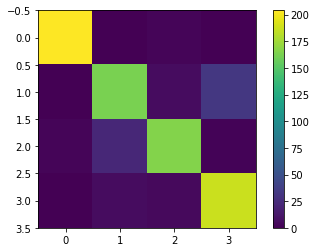

[[204   0   3   0]
 [  0 163   7  33]
 [  3  23 166   2]
 [  0   7   5 188]]


In [24]:
from sklearn.metrics import confusion_matrix

predictions = clf.predict(x_train)
plt.imshow(confusion_matrix(y_train, predictions))
plt.colorbar()
plt.show()

conf = confusion_matrix(y_train, predictions)

print(conf)

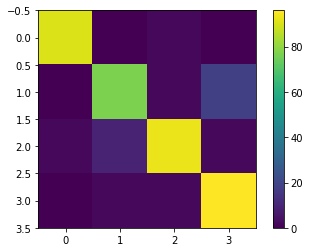

[[91  0  2  0]
 [ 0 77  2 18]
 [ 2  9 93  2]
 [ 0  2  2 96]]


In [26]:
predictions = clf.predict(x_test)
plt.imshow(confusion_matrix(y_test, predictions))
plt.colorbar()
plt.show()

conf = confusion_matrix(y_test, predictions)

print(conf)